##### set parent directory

In [1]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Move to the parent directory
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

# Print the updated working directory
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Current Directory: /mnt/c/users/rjmay/code/research_ms/alt_distr
Updated Directory: /mnt/c/users/rjmay/code/research_ms


In [2]:
! source "../venv/bin/activate"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import pickle
import time



In [4]:
# from modules.multi_bounds_v3 import bounds_class
# from modules.Bhatt_knn_func import knn_num_calc
# from modules.data_gen import data_gen

In [5]:
PICKLED =True

dim_str  = "8"

In [6]:
file_path = 'sim_data/paired_uniforms' + dim_str+'.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE

    

if PICKLED == True:


    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load to deserialize and load the list of objects from the file
        loaded_objects = pickle.load(file)

    print('Loaded object successfully')
    
    bound_obj_lst, sample_sizes = loaded_objects

Loaded object successfully


### Using the data



In [7]:
dpi = 250

# sample_sizes = np.logspace(2, 3.3011, 9 , endpoint = True, dtype = int)
sample_sizes = sample_sizes *2

In [8]:
lst = [obj() for obj in bound_obj_lst ]

df = pd.DataFrame(lst, index = sample_sizes)

df.T

/home/rjmay/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rjmay/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,108,168,266,420,660,1038,1634,2570,4042,6358,10000
Dp_lower,0.173317,0.161695,0.147624,0.139797,0.130510,0.122823,0.115827,0.110163,0.104958,0.100897,0.097487
Dp_upper,0.283912,0.269702,0.250855,0.239964,0.226689,0.215277,0.204720,0.195997,0.187846,0.181409,0.175952
Bha_lower,0.040761,0.039170,0.039025,0.039449,0.038185,0.038532,0.038204,0.038105,0.038020,0.038089,0.038193
Bha_upper,0.194000,0.191871,0.192398,0.193857,0.191218,0.192145,0.191518,0.191338,0.191171,0.191364,0.191633
Bha_knn_lower,0.128751,0.120410,0.139832,0.154070,0.145159,0.162021,0.161668,0.159725,0.160492,0.159500,0.156338
Bha_knn_upper,0.331613,0.323417,0.345688,0.360313,0.351844,0.368189,0.368001,0.366242,0.366994,0.366092,0.363145
tight_lower,0.174483,0.166962,0.185419,0.200021,0.191689,0.208065,0.208631,0.207539,0.209284,0.209613,0.208039
tight_upper,0.180936,0.173157,0.192270,0.207363,0.198743,0.215667,0.216234,0.215090,0.216873,0.217191,0.215540
Maha_upper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inf_lower,0.010059,0.008475,0.013212,0.019919,0.013005,0.006591,0.010167,0.015045,0.021181,0.004612,0.007161


In [9]:
dp_l = []
dp_u = []

Bha_u =[]
Bha_l =[]

Bha_knn_u = []
Bha_knn_l = []

inf_l = []
inf_u = []

enDive_l = []
enDive_u = []


for obj in bound_obj_lst:
    a,b = obj.get_bounds_dp()
    dp_l.append(a)
    dp_u.append(b)
    
    a,b = obj.get_bounds_Bha()
    Bha_l.append(a)
    Bha_u.append(b)

    
#     a, b = obj.get_bounds_tight()
#     tight_l.append(a)
#     tight_u.append(b)
    
    a, b= obj.get_bounds_Bha_knn()
    Bha_knn_l.append(a)
    Bha_knn_u.append(b)
    
    a,b = obj.get_inf_bounds()
    inf_l.append(a)
    inf_u.append(b)
    
    a,b = obj.get_Bounds_enDive()
    enDive_l.append(a)
    enDive_u.append(b)
    
    

Calculate true values

In [10]:
import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm
from scipy.stats import uniform
#### I have to code the true values and theoreticals. 

# Define dx and x range
dx = 0.01
x = np.arange(-1, 2 + dx, dx)

# Define the two uniform distributions
pd0 = uniform(loc=0, scale=1)  # lower=0, upper=1
pd1 = uniform(loc=0.8, scale=1)  # lower=0.8, upper=1.8

# Compute the pdfs for both distributions over the x range
f0 = pd0.pdf(x)
f1 = pd1.pdf(x)
# Calculate the minimum of f0 and f1
min_f0_f1 = np.minimum(f0, f1)
# Calculate BER as 0.5 * sum(min(f0, f1) * dx)
BER = 0.5 * np.nansum(min_f0_f1 * dx)

p = 0.5
q = 0.5
pf0 = p * f0
qf1 = q * f1

# Calculate the function
func = (pf0 - qf1)**2 / (pf0 + qf1)

# Calculate dp using numerical integration (sum and dx)
dp = np.nansum(func) * dx

# Calculate upper and lower bounds
upper = 0.5 - 0.5 * dp
lower = 0.5 - 0.5 * np.sqrt(dp)
upper = round(upper, 8)

theory_Dp = [lower, upper]

func2 = np.sqrt(f0 * f1)
# Calculate BC using numerical integration (sum and dx)
BC = np.nansum(func2) * dx

lower = 0.5 - 0.5 * np.sqrt(1 - BC**2)
upper = 0.5 * BC

theory_bha = [lower, upper]


/tmp/ipykernel_32237/668631743.py:29: RuntimeWarning: invalid value encountered in divide
  func = (pf0 - qf1)**2 / (pf0 + qf1)


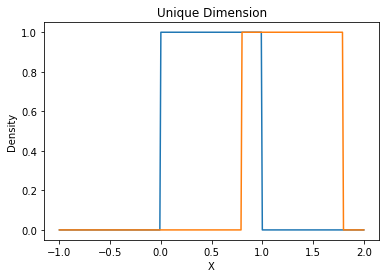

In [11]:
plt.plot(x, f0)
plt.plot(x, f1)
plt.title("Unique Dimension")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

In [12]:
print(theory_Dp, "\n", theory_bha)

[0.05278640450004207, 0.1] 
 [0.010102051443364402, 0.1]


True value is     0.10


In [13]:
### this cell helps to fix bugs from not doing the data in here. 
MC_num = len(bound_obj_lst[0])

BER_lst = np.ones(MC_num) * BER


def mse(l1, l2):## numpy lists
    return ((l1 - l2)**2).mean(axis=0)

In [14]:
# cases = len(sample_sizes)

## theoretical MSE
bha_theoretical_l= np.ones(MC_num) * (theory_bha[0])
bha_theoretical_u= np.ones(MC_num) * (theory_bha[1])


dp_theoretical_l= np.ones(MC_num) * theory_Dp[0]
dp_theoretical_u= np.ones(MC_num) * theory_Dp[1]


In [15]:
# print(upper_mse_Bha)

def mse_v2(true, matrix):
    temp = matrix - true
    temp = temp **2
    return np.mean(temp, axis= 1)
    

### Plotting

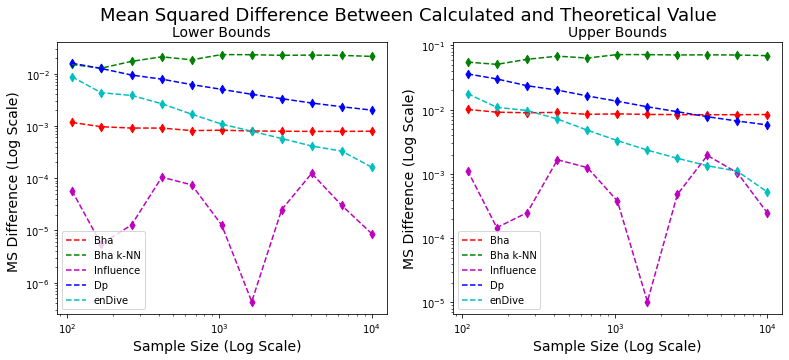

In [16]:
lower_mse_DP =mse_v2(theory_Dp[0], dp_l)
upper_mse_DP = mse_v2(theory_Dp[1], dp_u)

lower_mse_Bha = mse_v2(theory_bha[0], Bha_l)
upper_mse_Bha =mse_v2(theory_bha[1], Bha_u)


lower_mse_Bha_knn = mse_v2(theory_bha[0], Bha_knn_l)
upper_mse_Bha_knn =mse_v2(theory_bha[1], Bha_knn_u)

lower_mse_inf = mse_v2(theory_bha[0], inf_l)
upper_mse_inf = mse_v2(theory_bha[1], inf_u)

lower_mse_enDive = mse_v2(theory_Dp[0], enDive_l)
upper_mse_enDive = mse_v2(theory_Dp[1], enDive_u)


fs =14

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
st = fig.suptitle("Mean Squared Difference Between Calculated and Theoretical Value", fontsize=fs+4)
ax = axes[0]


ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, lower_mse_Bha, color = 'red', marker = 'd')

ax.plot(sample_sizes, lower_mse_Bha_knn, color = 'green',linestyle="--",  label = "Bha k-NN")
ax.scatter(sample_sizes, lower_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, lower_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, lower_mse_inf,  color='m', marker='d')

ax.plot(sample_sizes, lower_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, lower_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, lower_mse_enDive,  'c--', label='enDive')
ax.scatter(sample_sizes, lower_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale) ", fontsize=fs)
ax.set_title("Lower Bounds", fontsize = fs)



ax.legend()

ax = axes[1]

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, upper_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, upper_mse_Bha, color = 'red', marker = 'd')


ax.plot(sample_sizes, upper_mse_Bha_knn, color = 'g',  linestyle  = "--", label = "Bha k-NN")
ax.scatter(sample_sizes, upper_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, upper_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, upper_mse_inf,  color='m', marker='d')


ax.plot(sample_sizes, upper_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, upper_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, upper_mse_enDive,  'c--', label='enDive')
ax.scatter(sample_sizes, upper_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale)", fontsize=fs)
ax.set_title("Upper Bounds", fontsize = fs)

ax.legend()

# plt.savefig("log_test.png",facecolor=(1,1,1,1))
# ax.set_xticks(sample_sizes)

file_name = r"alt_distr/images/uniform_uniform_MSE"+ dim_str+".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()

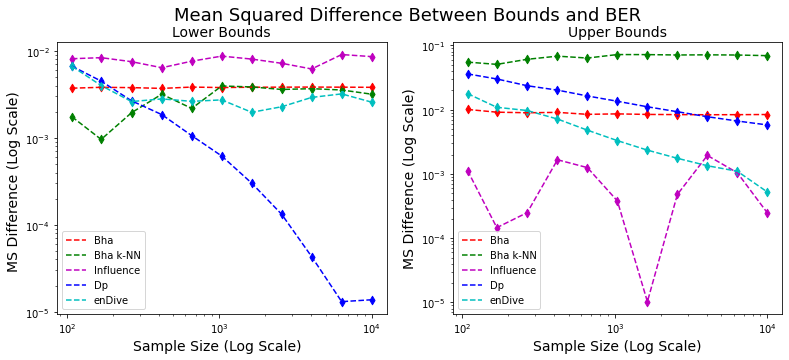

In [17]:
lower_mse_DP_BER =mse_v2(BER, dp_l)
upper_mse_DP_BER = mse_v2(BER, dp_u)

lower_mse_Bha_BER = mse_v2(BER, Bha_l)
upper_mse_Bha_BER =mse_v2(BER, Bha_u)


lower_mse_Bha_knn_BER = mse_v2(BER, Bha_knn_l)
upper_mse_Bha_knn_BER =mse_v2(BER, Bha_knn_u)

lower_mse_inf_BER = mse_v2(BER, inf_l)
upper_mse_inf_BER = mse_v2(BER, inf_u)

lower_mse_enDive_BER = mse_v2(BER, enDive_l)
upper_mse_enDive_BER = mse_v2(BER, enDive_u)

fs =14

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
st = fig.suptitle("Mean Squared Difference Between Bounds and BER", fontsize=fs+4)
ax = axes[0]


ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse_Bha_BER,'r--', label='Bha')
ax.scatter(sample_sizes, lower_mse_Bha_BER, color = 'red', marker = 'd')

ax.plot(sample_sizes, lower_mse_Bha_knn_BER, color = 'green',linestyle="--",  label = "Bha k-NN")
ax.scatter(sample_sizes, lower_mse_Bha_knn_BER, color = 'g', marker = 'd')

ax.plot(sample_sizes, lower_mse_inf_BER,  'm--', label='Influence')
ax.scatter(sample_sizes, lower_mse_inf_BER,  color='m', marker='d')

ax.plot(sample_sizes, lower_mse_DP_BER,  'b--', label='Dp')
ax.scatter(sample_sizes, lower_mse_DP_BER,  color='b', marker='d')


ax.plot(sample_sizes, lower_mse_enDive_BER,  'c--', label='enDive')
ax.scatter(sample_sizes, lower_mse_enDive_BER,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale) ", fontsize=fs)
ax.set_title("Lower Bounds", fontsize = fs)


ax.legend()

ax = axes[1]

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, upper_mse_Bha_BER,'r--', label='Bha')
ax.scatter(sample_sizes, upper_mse_Bha_BER, color = 'red', marker = 'd')


ax.plot(sample_sizes, upper_mse_Bha_knn_BER, color = 'g',  linestyle  = "--", label = "Bha k-NN")
ax.scatter(sample_sizes, upper_mse_Bha_knn_BER, color = 'g', marker = 'd')

ax.plot(sample_sizes, upper_mse_inf_BER,  'm--', label='Influence')
ax.scatter(sample_sizes, upper_mse_inf_BER,  color='m', marker='d')


ax.plot(sample_sizes, upper_mse_DP_BER,  'b--', label='Dp')
ax.scatter(sample_sizes, upper_mse_DP_BER,  color='b', marker='d')


ax.plot(sample_sizes, upper_mse_enDive_BER,  'c--', label='enDive')
ax.scatter(sample_sizes, upper_mse_enDive_BER,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale)", fontsize=fs)
ax.set_title("Upper Bounds", fontsize = fs )

ax.legend()



file_name = r"alt_distr/images/paired_uniform_MSE2"+ dim_str+ ".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()

Bhattacharyya, Bha Knn, influence same theoretically

Dp, enDive

In [18]:
lst = [obj.validity(BER) for obj in bound_obj_lst ]

df_valid = pd.DataFrame(lst, index = sample_sizes)

df_valid


,Dp_lower,Dp_upper,Bha_lower,Bha_upper,Bha_knn_lower,Bha_knn_upper,tight_lower,tight_upper,inf_lower,inf_upper,enDive_lower,enDive_upper,Dp,Bha,Bha_knn,tight,inf,enDive
108,0.0175,1.0,1.0,0.9975,0.1650,1.0,0.0150,0.9875,1.0,0.3525,0.5675,0.6600,0.0175,0.9975,0.1650,0.0025,0.3525,0.2275
168,0.0025,1.0,1.0,1.0000,0.1900,1.0,0.0025,1.0000,1.0,0.1050,0.6700,0.6275,0.0025,1.0000,0.1900,0.0025,0.1050,0.2975
266,0.0100,1.0,1.0,1.0000,0.0225,1.0,0.0000,1.0000,1.0,0.9650,0.6000,0.7600,0.0100,1.0000,0.0225,0.0000,0.9650,0.3600
420,0.0050,1.0,1.0,1.0000,0.0025,1.0,0.0000,1.0000,1.0,0.9800,0.7075,0.6625,0.0050,1.0000,0.0025,0.0000,0.9800,0.3700
660,0.0025,1.0,1.0,1.0000,0.0000,1.0,0.0000,1.0000,1.0,0.7025,0.7875,0.6125,0.0025,1.0000,0.0000,0.0000,0.7025,0.4000
1038,0.0100,1.0,1.0,1.0000,0.0000,1.0,0.0000,1.0000,1.0,0.0000,0.9075,0.5650,0.0100,1.0000,0.0000,0.0000,0.0000,0.4725
1634,0.0100,1.0,1.0,1.0000,0.0000,1.0,0.0000,1.0000,1.0,0.5300,0.9225,0.6725,0.0100,1.0000,0.0000,0.0000,0.5300,0.5950
2570,0.0175,1.0,1.0,1.0000,0.0000,1.0,0.0000,1.0000,1.0,1.0000,0.9575,0.6025,0.0175,1.0000,0.0000,0.0000,1.0000,0.5600
4042,0.1100,1.0,1.0,1.0000,0.0000,1.0,0.0000,1.0000,1.0,1.0000,0.9975,0.4325,0.1100,1.0000,0.0000,0.0000,1.0000,0.4300
6358,0.4125,1.0,1.0,1.0000,0.0000,1.0,0.0000,1.0000,1.0,0.0000,1.0000,0.3375,0.4125,1.0000,0.0000,0.0000,0.0000,0.3375


In [19]:
def add_noise_to_df(df, noise_level=0.01):
    """
    Add random noise to each column in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing the data to which noise will be added.
    
    Returns:
    - pandas DataFrame with noise added to each column.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_noisy = df.copy()
    
    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Calculate the range of the data in the column
#         data_range = df[col].max() - df[col].min()
        
        # Generate random noise from a normal distribution
#         noise = np.random.normal(0, noise_level * data_range, len(df[col]))
        noise = np.random.normal(0, noise_level )
#         noise = np.random.uniform(-1 * noise_level, noise_level)
        # Add the noise to the data in the column
        df_noisy[col] = df[col] + noise
    
    return df_noisy


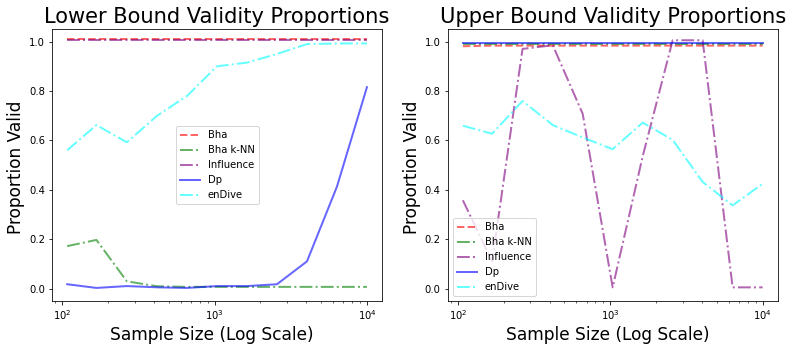

In [20]:
df_noise = add_noise_to_df(df_valid, .008)

fs =17
overlapping = 0.6
lw = 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax = axes[0]

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_noise["Bha_lower"],'r--', label='Bha', alpha = overlapping, linewidth=lw )

ax.plot(df_noise["Bha_knn_lower"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["inf_lower"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["Dp_lower"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["enDive_lower"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)


# ax.plot(df_valid["tight_lower"],'orange', label='Tight  ')


# ax.plot(sample_sizes, validity_tight_u/ MC_num,  label='Upper Tight Validity ')
# ax.set_xticks(sample_sizes)
ax.set_ylim(-0.05,1.05)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_title("Lower Bound Validity Proportions" , fontsize = fs +4)
ax.legend()


ax = axes[1]

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df_noise["Bha_upper"],'r--', label='Bha', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["Bha_knn_upper"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["inf_upper"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth =lw)

ax.plot(df_noise["Dp_upper"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["enDive_upper"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)


# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Upper Bound Validity Proportions" , fontsize = fs +4)
ax.legend()

# plt.subplots_adjust(left=0.05, right=0.96, bottom=0.1, top=0.90)


file_name = r"alt_distr/images/uniform_uniform_validity"+ dim_str+".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()

Experimental Validity

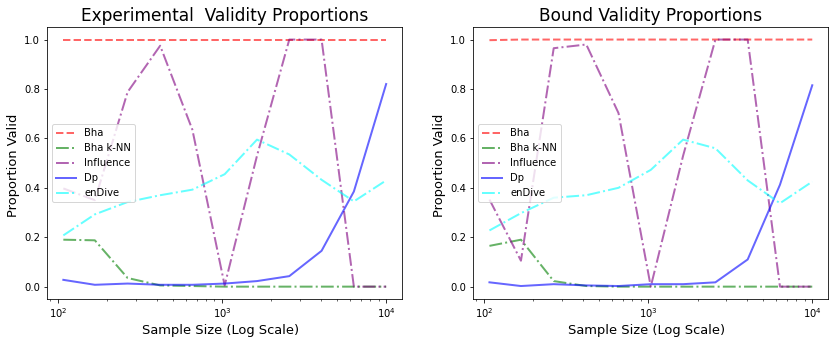

In [21]:
fs =13

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax = axes[1]
ax1 = ax

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_valid["Bha"],'r--', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(df_valid["Bha_knn"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["inf"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["Dp"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["enDive"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)

# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Bound Validity Proportions" , fontsize = fs +4)
ax.legend()


lst = [obj.experimental_validity() for obj in bound_obj_lst ]
df_valid2 = pd.DataFrame(lst, index = sample_sizes)

ax = axes[0]

# df_noise2 = add_noise_to_df(df_valid2, .008)


ax = axes[0]
ax1 = ax

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_valid2["Bha"],'r--', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(df_valid2["Bha_knn"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(df_valid2["inf"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(df_valid2["Dp"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(df_valid2["enDive"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)

# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Experimental  Validity Proportions" , fontsize = fs +4)
ax.legend()

plt.show()


### Master Plot


In [22]:
lst = [obj.bound_width() for obj in bound_obj_lst ]

bound_width_df = pd.DataFrame(lst, index = sample_sizes)

bound_width_df.head()

,Dp,Bha,Bha_knn,tight,inf,enDive
108,0.110595,0.153239,0.202862,0.006453,0.083799,0.065489
168,0.108007,0.152702,0.203007,0.006195,0.082798,0.059831
266,0.103231,0.153374,0.205856,0.006851,0.100708,0.068283
420,0.100167,0.154408,0.206243,0.007342,0.119339,0.059245
660,0.096180,0.153033,0.206685,0.007054,0.094574,0.054447


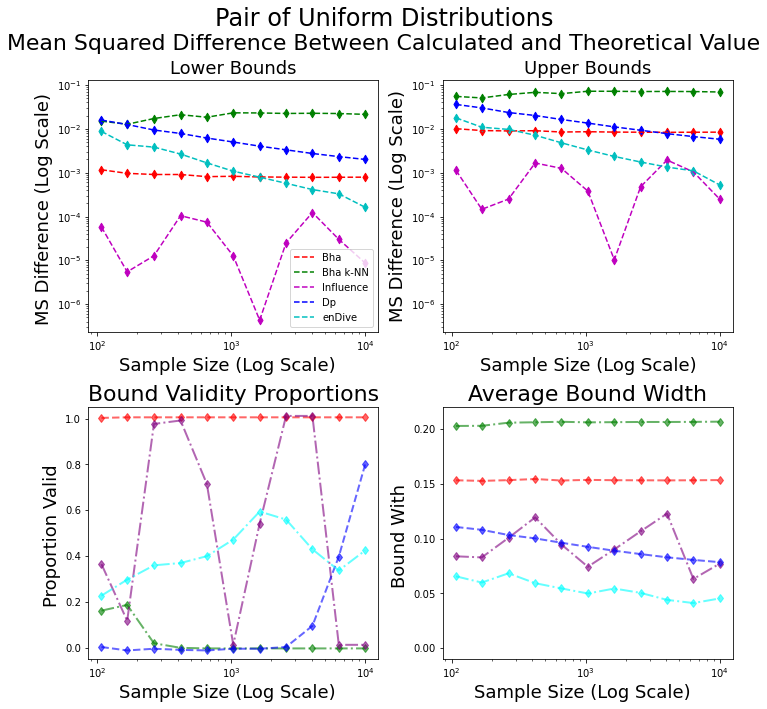

In [ ]:

fs =18

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),sharex='all')

st = fig.suptitle("Pair of Uniform Distributions", fontsize=fs+6
                  )

fig.text(0.5, 0.92, "Mean Squared Difference Between Calculated and Theoretical Value", ha='center', fontsize=fs+4 )

# Manually share y-axis between axes[0][0] and axes[0][1]
axes[0][1].get_shared_y_axes().join(axes[0][0], axes[0][1])


ax = axes[0][0]


ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, lower_mse_Bha, color = 'red', marker = 'd')

ax.plot(sample_sizes, lower_mse_Bha_knn, color = 'green',linestyle="--",  label = "Bha k-NN")
ax.scatter(sample_sizes, lower_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, lower_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, lower_mse_inf,  color='m', marker='d')

ax.plot(sample_sizes, lower_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, lower_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, lower_mse_enDive,  'c--', label='EnDive')
ax.scatter(sample_sizes, lower_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale) ", fontsize=fs)
ax.set_title("Lower Bounds", fontsize = fs)
# ax.legend()



ax = axes[0][1]

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, upper_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, upper_mse_Bha, color = 'red', marker = 'd')


ax.plot(sample_sizes, upper_mse_Bha_knn, color = 'g',  linestyle  = "--", label = "Bha k-NN")
ax.scatter(sample_sizes, upper_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, upper_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, upper_mse_inf,  color='m', marker='d')


ax.plot(sample_sizes, upper_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, upper_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, upper_mse_enDive,  'c--', label='EnDive')
ax.scatter(sample_sizes, upper_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale)", fontsize=fs)
ax.set_title("Upper Bounds", fontsize = fs)
# ax.legend()


ax = axes[1][0]
ax1 = ax

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)




ax.plot(df_noise["Bha"], 'r--d', label='Bha', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["Bha_knn"], 'g-.d', label='Bha k-NN', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["inf"], color='purple', linestyle='-.', marker='d', label='Influence', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["Dp"], 'b--d', label='Dp', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["enDive"], color = 'cyan', linestyle='-.', marker ='d', label='enDive', alpha=overlapping, linewidth=lw)


# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Bound Validity Proportions" , fontsize = fs +4)
# ax.legend()


ax = axes[1][1]

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(bound_width_df["Bha"],'r--d', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(bound_width_df["Bha_knn"],'g-.d', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["inf"],color = 'purple',ls = "-.", marker= 'd', label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["Dp"], 'b--d',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["enDive"],color = 'cyan',ls = "-.", marker = 'd',label='enDive', alpha = overlapping, linewidth = lw)

# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Bound With ", fontsize=fs)
# ax.set_ylim(0.0, 0.3)
ax.set_title("Average Bound Width" , fontsize = fs +4)
# ax.legend()
ax.set_ylim((-0.01, .22))


fig.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the common title


 #Get unique handles and labels from any subplot
handles, labels = axes[0][0].get_legend_handles_labels()

# Create a single legend below the entire figure
fig.legend(handles, labels, loc='lower center', ncol=5, fontsize=fs, bbox_to_anchor=(0.5, -0.05))
plt.rcParams.update({'font.size': 14})


# ax.set_xticks(sample_sizes)

file_name = r"alt_distr/images/master/paired_uniform_master"+dim_str+ ".png"
plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)


file_name = r"alt_distr/images/dpi/paired_uniform_master"+dim_str+ ".png"
plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= 600)
plt.show()